                                      EDA-анализ базы данных токсинов и их мишеней
                                                    ВВЕДЕНИЕ
Целью работы с базой данных является выявления закономерностей между токсикологическими свойствами веществ и характеристиками их молекул.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import numpy as np
import re

In [24]:
df = pd.read_parquet("C:/Users/DNS/Desktop/my_project/converted_data_fixed.parquet")

                                                   ОСНОВНОЙ АНАЛИЗ

Этап 1: Оценка структуры данных

In [27]:

print("Размер датасета:", df.shape)
print("Типы данных:", df.types)
df.head(30)
#df.tail(30)

Размер датасета: (3915, 58)
Типы данных: 0       [{'id': 1, 'type_name': 'Inorganic Compound', ...
1       [{'id': 1, 'type_name': 'Inorganic Compound', ...
2       [{'id': 1, 'type_name': 'Inorganic Compound', ...
3       [{'id': 7, 'type_name': 'Organic Compound', 'c...
4       [{'id': 7, 'type_name': 'Organic Compound', 'c...
                              ...                        
3910    [{'id': 1, 'type_name': 'Inorganic Compound', ...
3911                                                   []
3912                                                   []
3913                                                   []
3914                                                   []
Name: types, Length: 3915, dtype: string


,Unnamed: 0,id,title,common_name,description,cas,pubchem_id,chemical_formula,weight,appearance,...,chembl_id,chemspider_id,biodb_id,synthesis_reference,structure_image_caption,synonyms_list,types,cellular_locations,tissues,pathways
0,0,2.0,T3D0001,Arsenic,Arsenic(As) is a ubiquitous metalloid found in...,7440-38-2,104734.0,As,74.921600,Grey metallic solid.,...,<NA>,94549,<NA>,<NA>,<NA>,Arsenic ion\r\nArsenic(3+)\r\nArsenic(3+) ion\...,"[{'id': 1, 'type_name': 'Inorganic Compound', ...","[{'id': 1, 'name': 'Cytoplasm', 'created_at': ...",[],[]
1,1,3.0,T3D0002,Lead,Lead is a soft and malleable heavy and post-tr...,7439-92-1,73212.0,Pb,207.976654,"Bluish-white metallic solid, turns grey when e...",...,<NA>,65967,<NA>,<NA>,<NA>,Lead (II) cation\r\nLead ion\r\nLead ion (Pb2+...,"[{'id': 1, 'type_name': 'Inorganic Compound', ...","[{'id': 1, 'name': 'Cytoplasm', 'created_at': ...",[],[]
2,2,4.0,T3D0003,Mercury,Mercury is a metal that is a liquid at room te...,7439-97-6,26623.0,Hg,201.970642,Silver metallic liquid.,...,<NA>,24800,<NA>,<NA>,<NA>,Hg(2+)\r\nHg2+\r\nMercuric ion\r\nMercury ion\...,"[{'id': 1, 'type_name': 'Inorganic Compound', ...","[{'id': 1, 'name': 'Cytoplasm', 'created_at': ...",[],[]
3,3,5.0,T3D0004,Vinyl chloride,"Vinyl chloride is a man-made organic compound,...",75-01-4,6338.0,C2H3Cl,61.992330,"Colorless gas, usually stored as a liquid.",...,<NA>,<NA>,<NA>,<NA>,<NA>,Chloroethene\r\nChloroethylene\r\nMonochloroet...,"[{'id': 7, 'type_name': 'Organic Compound', 'c...","[{'id': 1, 'name': 'Cytoplasm', 'created_at': ...",[],[]
4,4,7.0,T3D0006,Benzene,"Benzene is a toxic, volatile, flammable liquid...",71-43-2,241.0,C6H6,78.046950,Colorless liquid.,...,CHEMBL277500,236,<NA>,"Copisarow, Maurice; Long, Cyril N H. The Fried...",<NA>,Annulene\r\nAromatic alkane\r\nBenzeen\r\nBenz...,"[{'id': 7, 'type_name': 'Organic Compound', 'c...","[{'id': 1, 'name': 'Cytoplasm', 'created_at': ...","[{'id': 4, 'name': 'Bone Marrow', 'created_at'...",[]
5,5,8.0,T3D0007,Cadmium,Cadmium (group IIB of the periodic table of el...,7440-43-9,31193.0,Cd,113.903358,Bluish-white metallic solid.,...,<NA>,28935,<NA>,<NA>,<NA>,Cadmium ion\r\nCadmium(2+)\r\nCadmium(2+) ion\...,"[{'id': 1, 'type_name': 'Inorganic Compound', ...","[{'id': 1, 'name': 'Cytoplasm', 'created_at': ...",[],[]
6,6,10.0,T3D0009,Benzo[a]pyrene,Benzo[a]pyrene is one of over 100 different po...,50-32-8,2336.0,C20H12,252.093900,Pale yellow solid.,...,CHEMBL31184,2246,<NA>,<NA>,<NA>,"1,2-Benzpyrene\r\n3,4 Benzopyrene\r\n3,4 Benzp...","[{'id': 7, 'type_name': 'Organic Compound', 'c...","[{'id': 3, 'name': 'Membrane', 'created_at': '...",[],[]
7,7,11.0,T3D0010,Benzo[b]fluoranthene,Benzo[b]fluoranthene is one of over 100 differ...,205-99-2,9153.0,C20H12,252.093900,Colorless solid.,...,CHEMBL1337502,8799,<NA>,<NA>,<NA>,"2, 3-Benzofluoranthene\r\n2,3-Benzfluoranthene...","[{'id': 7, 'type_name': 'Organic Compound', 'c...","[{'id': 3, 'name': 'Membrane', 'created_at': '...",[],[]
8,8,12.0,T3D0011,Chloroform,Chloroform is found in spearmint. Indirect foo...,67-66-3,6212.0,CHCl3,117.914380,Colorless liquid.,...,CHEMBL44618,5977,<NA>,<NA>,<NA>,"1,1,1-Trichloromethane\r\nCF\r\nCHCl3\r\nFormy...","[{'id': 7, 'type_name': 'Organic Compound', 'c...","[{'id': 1, 'name': 'Cytoplasm', 'created_at': ...",[],[]
9,9,13.0,T3D0012,Clofenotane,Insecticide. Clofenotane is a major component ...,50-29-3,3036.0,C14H9Cl5,351.914690,White powder.,...,CHEMBL416898,2928,<NA>,<NA>,<NA>,"1,1'-(2,2,2-Trichloroethane-1,1-diyl)bis(4-chl...","[{'id': 7, 'type_name': 'Organic Compound', 'c...","[{'id': 3, 'name': 'Membrane', 'created_at': '...",[],[]


Этап 2: Оценка полноты и целостности данных

In [28]:
print("Количество отсутствующих значений:", df.isnull().sum())
missing = df.isnull().sum().sort_values(ascending = False) # Переменная, в которой записано количество пропусков в каждом столбце
missing_percent = (missing / len(df) * 100).round(1)
print("Определение процента пропусков в каждом столбце:\n", missing_percent)
print("\nОбщее количество пропусков:", missing.sum())
duplicates = df.duplicated().sum()
print("Количество дублирующихся строк:", duplicates)

Количество отсутствующих значений: Unnamed: 0                    3
id                          236
title                       186
common_name                  74
description                  97
cas                         261
pubchem_id                  462
chemical_formula            288
weight                     1412
appearance                  287
melting_point              2002
boiling_point              3482
solubility                 2369
route_of_exposure           861
mechanism_of_toxicity       688
metabolism                  915
toxicity                   2794
lethaldose                 3893
carcinogenicity             282
use_source                  922
min_risk_level             3913
health_effects             1067
symptoms                   1040
treatment                  1544
created_at                  411
updated_at                  411
wikipedia                  2739
uniprot_id                 3622
kegg_compound_id           2472
omim_id                    3691
chebi

Выводы:
1. У значительной части столбцов есть пропуски, особенно в structure_image_caption, что не является значимым для анализа, и столбцах, содержащих идентификаторы веществ из внешних баз.
2. Базовые поля необходимые для анализа содержат меньше пропусков и пригодны для анализа.
3. Дублирующиеся строки в датасете отсутствуют.

Этап 3: Оценка выбросов и аномалий


График распределения:


state
Solid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     2890
Liquid                                                                                                             

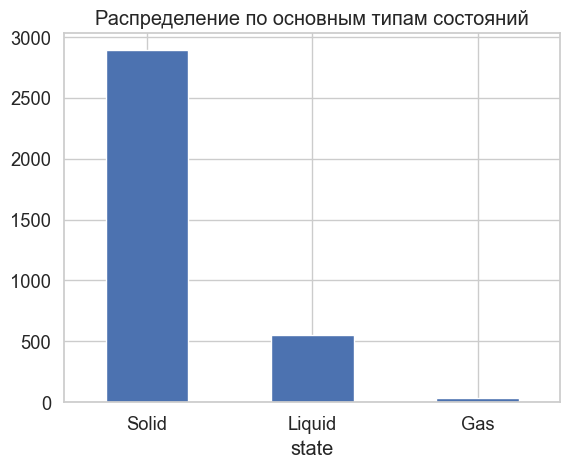


График распределения:


origin
Exogenous                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

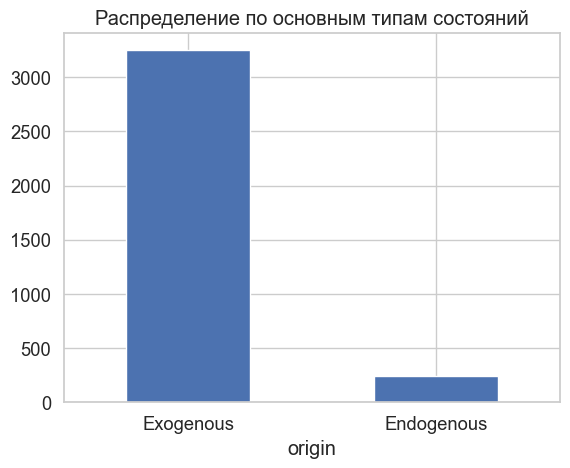

In [29]:
cat_cols = ['state', 'origin']

for col in cat_cols:
    print("\nГрафик распределения:")
    display(df[col].value_counts())

    if col == 'state':
        allowed = ['Solid', 'Liquid', 'Gas']
    elif col == 'origin':
        allowed = ['Exogenous', 'Endogenous']
    else:
        allowed = df[col].unique()

    filtered = df[df[col].isin(allowed)]

    filtered[col].value_counts().plot(
        kind='bar',
        title=f"Распределение по основным типам состояний"
    )
    plt.xticks(rotation=0)
    plt.show()

Выводы:
1. Большинство токсинов имеют экзогенное происхождение.
2. По состоянию преобладают твердые и жидкие токсины.

In [30]:
numeric_cols = ['moldb_average_mass', 'moldb_mono_mass', 'logp']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nСтатистика по числовым признакам:")
display(df[numeric_cols].describe())


Статистика по числовым признакам:


,moldb_average_mass,moldb_mono_mass,logp
count,3376.000000,3372.000000,603.000000
mean,299.824120,299.333362,1.943242
std,197.229983,196.588186,2.523864
min,-0.640000,6.032099,-13.200000
25%,178.260325,179.069685,0.390000
50%,271.527000,270.635367,2.120000
75%,361.980625,361.843825,3.560000
max,3425.856000,3423.581083,10.000000


                                      Проверка выбросов с помощью IQR


 moldb_average_mass: 168 выбросов (из 3915)

 moldb_mono_mass: 162 выбросов (из 3915)

 logp: 8 выбросов (из 3915)


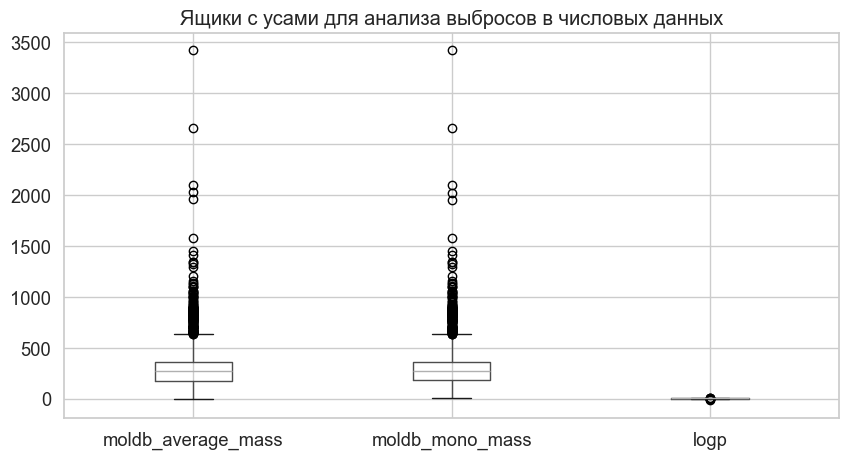

In [31]:
for col in numeric_cols:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        print(f"\n {col}: {len(outliers)} выбросов (из {len(df)})")

df.boxplot(column=numeric_cols, figsize=(10,5))
plt.title("Ящики с усами для анализа выбросов в числовых данных")
plt.show()

Выводы:

1. Молекулярные массы токсинов сконцентрированы в узком диапазоне, что говорит об общей однородности датафрейма по этому признаку. Немногочисленным выбросам, вероятно, соответствуют токсины с атипичной структурой.
2. Липофильность (logP) указана только для части соединений, поэтому этот показатель нельзя использовать для анализа всей выборки.

Этап 4: Метрики качества данных

В данном отчёте используются две основные метрики качества данных: полнота данных и уникальность записей.

In [32]:
total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
completeness = round(1 - (total_missing / total_cells), 3)

print("Completeness (полнота данных):", completeness, "(в норме ≥ 0.98)")
if completeness >= 0.98:
    print("Полнота данных является нормальной.")
else:
    print("Имеется значительное количество пропусков данных.")


duplicate_count = df.duplicated().sum()
uniqueness = round(1 - (duplicate_count / len(df)), 3)

print(" Uniqueness (уникальность данных):", uniqueness)
if uniqueness == 1.0:
    print("Все записи уникальны.")
else:
    print("Обнаружено {duplicate_count} дубликатов из {len(df)} строк.")


Completeness (полнота данных): 0.593 (в норме ≥ 0.98)
Имеется значительное количество пропусков данных.
 Uniqueness (уникальность данных): 1.0
Все записи уникальны.


                                                Заключение

В ходе проведённого EDA-анализа данных оценивалась структура, полнота и качество данных в датафрейме токсинов и их мишеней. Большая часть данных является уникальной, но полнота данных находится на низком уровне и требует доработки. Распределения числовых параметров в целом стабильные, с небольшим числом выбросов.

Этап 5: Визуализация с помощью библиотеки Seaborn

Задаём единый кастомный стиль

In [33]:
sns.set_theme(
    style="whitegrid",
    palette="deep",
    font_scale=1.2
)

1. Построим комбинированный график распределения молекулярных масс соединений

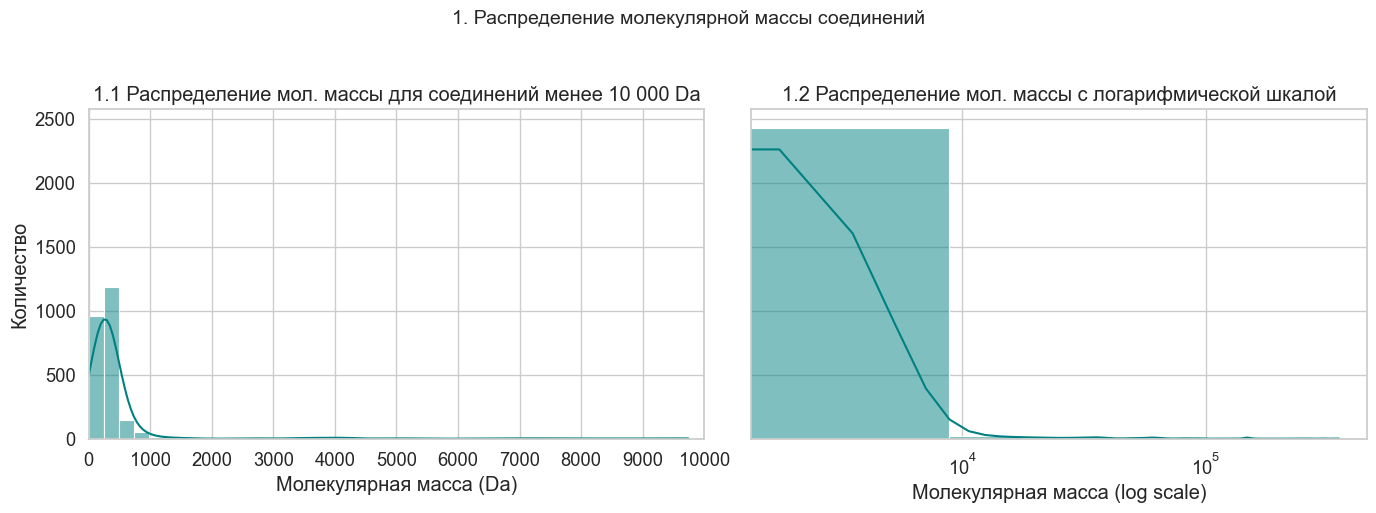

In [49]:
w = df["weight"].dropna()
w_main = w[w <= 10_000]
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(w_main, bins=40, kde=True, color="teal", ax=axes[0])
axes[0].set_title("1.1 Распределение мол. массы для соединений менее 10 000 Da")
axes[0].set_xlabel("Молекулярная масса (Da)")
axes[0].set_ylabel("Количество")
axes[0].set_xlim(0, 10_000)
axes[0].set_xticks(np.arange(0, 10_001, 1_000))

sns.histplot(w, bins=40, kde=True, color="teal", ax=axes[1])
axes[1].set_title("1.2 Распределение мол. массы с логарифмической шкалой")
axes[1].set_xlabel("Молекулярная масса (log scale)")
axes[1].set_ylabel("Количество")
axes[1].set_xscale("log")

fig.suptitle("1. Распределение молекулярной массы соединений", y=1.03, fontsize=14)

plt.tight_layout()
plt.show()

 График 1.1 демонстрирует, что подавляющее большинство соединений имеет молекулярную массу менее 1000 Da, следовательно, относятся к низкомолекулярным органическим веществам. Соединения с массой более 2 000 Da встречаются редко. График 1.2 позволяет увидеть всю совокупность значений и подтверждает наличие небольшого количество крупных молекул с массой до 10⁵ Da.

Таким образом, распределение молекулярной массы соответствует положительно перекошенному распределению (right-skewed distribution). Данные характеризуются большим числом лёгких соединений - простых органических токсинов, и редкими, но значительно более тяжёлыми биомолекулами, также обладающими токсическими свойствами.

2. Построим тепловые карты для отражения корреляции между молекулярной массой соединений и их температурами плавления и кипения.

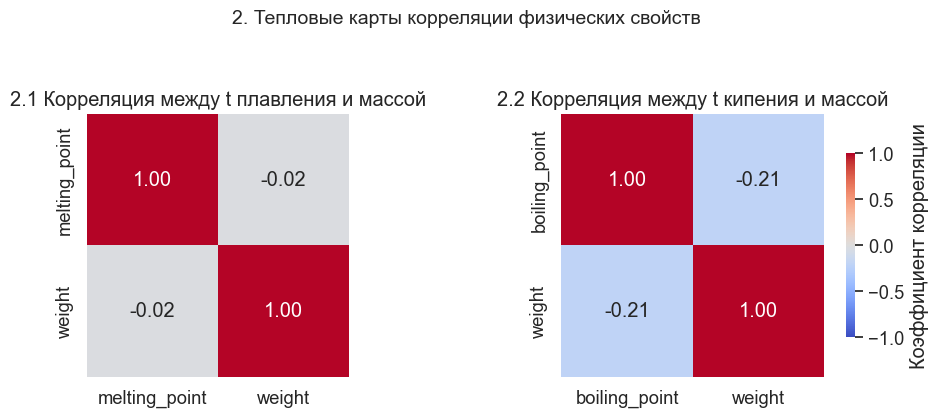

In [45]:
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)
subset_melt = df[["melting_point", "weight"]].dropna()
subset_boil = df[["boiling_point", "weight"]].dropna()
corr_melt = subset_melt.corr()
corr_boil = subset_boil.corr()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(
    corr_melt, annot=True, fmt=".2f", cmap="coolwarm",
    vmin=-1, vmax=1, square=True, ax=axes[0], cbar=False
)
axes[0].set_title("2.1 Корреляция между t плавления и массой")

sns.heatmap(
    corr_boil, annot=True, fmt=".2f", cmap="coolwarm",
    vmin=-1, vmax=1, square=True, ax=axes[1],
    cbar_kws={"shrink": 0.7, "label": "Коэффициент корреляции"}
)
axes[1].set_title("2.2 Корреляция между t кипения и массой")

plt.suptitle("2. Тепловые карты корреляции физических свойств", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

Выводы:
1. На тепловой карте 2.1 отражена взаимосвязь между температурой плавления и массой. Полученное значение коэффициента корреляции r = –0.02 указывает на отсутствие статистически значимой зависимости между этими параметрами. Это означает, что в данном наборе данных увеличение или уменьшение массы соединения не сопровождается закономерным изменением температуры плавления. Вероятнее всего, это связано с тем, что датасет включает химические вещества разных классов и структур (органические, неорганические, металлы, соли), у которых физико-химические свойства формируются под действием разных параметров — типа связи, кристаллической решётки, степени полярности.
Таким образом, можно сделать вывод, что масса вещества не является надёжным предиктором температуры плавления в рамках данной выборки.

2. На тепловой карте 2.2 показана взаимосвязь между температурой кипения и массой. Коэффициент корреляции r = –0.21 указывает на слабую отрицательную зависимость между этими параметрами. Следовательно, с ростом молекулярной массы температура кипения имеет тенденцию к небольшому снижению, однако связь выражена незначительно. Такой результат вероятно также свзязан с разнородностью соединений в наборе данных: представленные вещества относятся к разным классам и обладают разными механизмами межмолекулярных взаимодействий, влияющих на температуру фазового перехода.
Таким образом, в рамках данного датасета молекулярная масса оказывает лишь слабое и непостоянное влияние на температуру кипения.

3. Гистограмма распределения для показателей липофильности соединений.

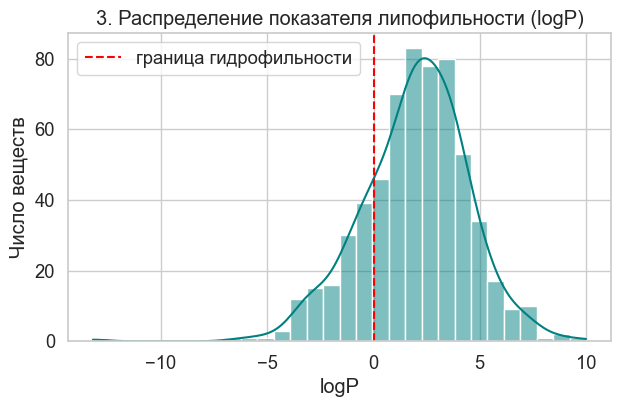

In [50]:
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

plt.figure(figsize=(7, 4))
sns.histplot(df["logp"].dropna(), bins=30, kde=True, color="teal")
plt.title("3. Распределение показателя липофильности (logP)")
plt.xlabel("logP")
plt.ylabel("Число веществ")
plt.axvline(0, color="red", linestyle="--", label="граница гидрофильности")
plt.legend()
plt.show()

Вывод: Распределение значений logP показывает, что большинство соединений в датасете имеют значение больше нуля, что соответствует умеренной и высокой липофильности. Липофильные вещества способны с лёгкостью проникать через клеточные мембраны и накапливаться в организме, что и характерно для большинства токсинов из датасета. Меньшая часть соединений проявляет гифдрофильность и растворима в воде, а, значит, быстрее выводится из организма и не имеет накопительного эффекта.